Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import the necessary packages
from sklearn.svm import LinearSVC
from imutils import paths
import cv2
import os
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.color import rgb2gray
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
# Import libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_log_error
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import math
from tqdm import tqdm_notebook
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV
from mlxtend.regressor import StackingCVRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV
from scipy import stats

from google.colab import drive


This image is: <class 'numpy.ndarray'>  with dimensions: (250, 250, 3)


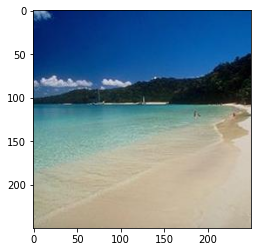

In [ ]:
image = cv2.imread('Training and Validation/nofire/nofire_0009.jpg')

print('This image is:', type(image), 
      ' with dimensions:', image.shape)
image_copy = np.copy(image)

# RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

In [ ]:
# import the necessary packages
from skimage import feature
import numpy as np

class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius

	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))

		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		# return the histogram of Local Binary Patterns
		return hist

In [ ]:
# initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(24, 8)
data = []
labels = []

In [ ]:
# loop over the training images
for imagePath in paths.list_images("/content/drive/MyDrive/Colab/Computer Vision/Dataset/Training and Validation/fire"):
	# load the image, convert it to grayscale, and describe it
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	hist = desc.describe(gray)
	hist = np.append(hist,describe_hog(hog_feature(image)))
	# extract the label from the image path, then update the
	# label and data lists
	labels.append('fire')
	data.append(hist)

[1.95520000e-02 1.09440000e-02 7.39200000e-03 8.32000000e-03
 8.86400000e-03 1.06720000e-02 1.19040000e-02 1.68640000e-02
 1.99200000e-02 2.64160000e-02 3.21760000e-02 4.68960000e-02
 4.87360000e-02 5.30720000e-02 3.96960000e-02 3.23520000e-02
 2.18240000e-02 1.86400000e-02 1.19680000e-02 1.12640000e-02
 8.48000000e-03 9.96800000e-03 9.07200000e-03 1.20960000e-02
 2.07104000e-01 2.95808000e-01 6.39419556e-02 2.68783569e-02
 2.20565796e-02 1.46636963e-02 9.54437256e-03 5.21850586e-03
 4.03594971e-03 3.55529785e-03 2.77709961e-03 2.13623047e-03
 2.56347656e-03 2.14385986e-03 2.01416016e-03 1.92260742e-03
 7.01904297e-04 9.15527344e-05 5.56945801e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.84799194e-01 1.50398254e-01]
['fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire

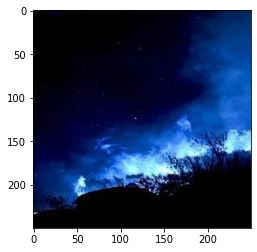

In [ ]:
from matplotlib import pyplot as plt
print(hist)
print (labels)
plt.imshow(image)
plt.show()

In [ ]:
# loop over the training images
for imagePath in paths.list_images("/content/drive/MyDrive/Colab/Computer Vision/Dataset/Training and Validation/nofire"):
	# load the image, convert it to grayscale, and describe it
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	hist = desc.describe(gray)
	hist = np.append(hist,describe_hog(hog_feature(image)))
	# extract the label from the image path, then update the
	# label and data lists
	labels.append('nofire')
	data.append(hist)

[4.11360000e-02 4.08160000e-02 7.28000000e-03 3.50400000e-03
 2.40000000e-03 1.77600000e-03 1.84000000e-03 3.50400000e-03
 3.76000000e-03 5.02400000e-03 6.49600000e-03 1.01440000e-02
 1.56800000e-02 2.55680000e-02 9.50400000e-03 1.11840000e-02
 4.24000000e-03 6.30400000e-03 2.28800000e-03 4.43200000e-03
 3.68000000e-03 4.65600000e-03 7.16800000e-03 3.60480000e-02
 4.01120000e-02 7.01456000e-01 7.59429932e-02 2.74276733e-02
 2.48260498e-02 2.12860107e-02 1.41525269e-02 9.15527344e-03
 6.79779053e-03 4.34112549e-03 3.33404541e-03 2.76947021e-03
 2.90679932e-03 2.67028809e-03 1.97601318e-03 1.41906738e-03
 3.58581543e-04 3.05175781e-05 1.67846680e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.99044800e-01 2.01393127e-01]
['fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire

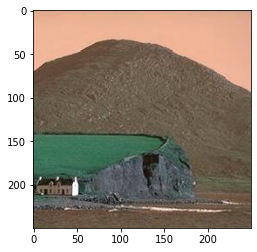

In [ ]:
from matplotlib import pyplot as plt
print(hist)
print (labels)
plt.imshow(image)
plt.show()

In [ ]:
# train a Linear SVM on the data
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=1)
model = LinearSVC(C=100.0, random_state=42)
model.fit(data, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100.0, random_state=42)

In [ ]:
predictions = []

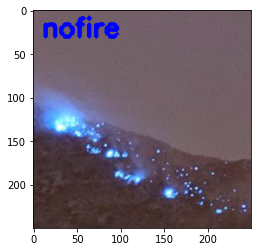

In [ ]:
# loop over the testing images
for imagePath in paths.list_images("/content/drive/MyDrive/Colab/Computer Vision/Dataset/Testing/fire"):
  # load the image, convert it to grayscale, describe it,
  # and classify it
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = desc.describe(gray)
  hist = np.append(hist,describe_hog(hog_feature(image)))
  prediction = model.predict(hist.reshape(1, -1))
  predictions.append(prediction)
  cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
  plt.imshow(image)

In [ ]:
true = []
for i in predictions:
  if(i == 'fire'):
    true.append(1)
  else:
    true.append(0)
print(true)
print(sum(true)/len(true))

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
0.8315789473684211


In [ ]:
predictions= []

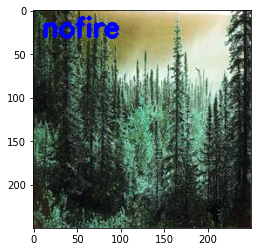

In [ ]:
# loop over the testing images
for imagePath in paths.list_images("/content/drive/MyDrive/Colab/Computer Vision/Dataset/Testing/nofire"):
  # load the image, convert it to grayscale, describe it,
  # and classify it
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = desc.describe(gray)
  hist = np.append(hist,describe_hog(hog_feature(image)))
  prediction = model.predict(hist.reshape(1, -1))
  predictions.append(prediction)
  cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
  plt.imshow(image)

In [ ]:
true = []
for i in predictions:
  if(i == 'nofire'):
    true.append(1)
  else:
    true.append(0)
print(true)
print(sum(true)/len(true))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.9526315789473684


In [ ]:
def hog_feature(image_copy):
  from skimage.io import imread
  from skimage.transform import resize
  from skimage.feature import hog
  from skimage import exposure
  import matplotlib.pyplot as plt
  import math
  from skimage.transform import resize
  image = resize(color.rgb2gray(image_copy), (128, 64))
  img = np.array(image)
  mag = []
  theta = []
  for i in range(128):
    magnitudeArray = []
    angleArray = []
    for j in range(64):
      # Condition for axis 0
      if j-1 <= 0 or j+1 >= 64:
        if j-1 <= 0:
          # Condition if first element
          Gx = img[i][j+1] - 0
        elif j + 1 >= len(img[0]):
          Gx = 0 - img[i][j-1]
      # Condition for first element
      else:
        Gx = img[i][j+1] - img[i][j-1]
    
      # Condition for axis 1
      if i-1 <= 0 or i+1 >= 128:
        if i-1 <= 0:
          Gy = 0 - img[i+1][j]
        elif i +1 >= 128:
          Gy = img[i-1][j] - 0
      else:
        Gy = img[i-1][j] - img[i+1][j]

      # Calculating magnitude
      magnitude = math.sqrt(math.pow(Gx, 2) + math.pow(Gy, 2))
      magnitudeArray.append(round(magnitude, 9))

      # Calculating angle
      if Gx == 0:
        angle = math.degrees(0.0)
      else:
        angle = math.degrees(abs(math.atan(Gy / Gx)))
      angleArray.append(round(angle, 9))
    mag.append(magnitudeArray)
    theta.append(angleArray)
  mag = np.array(mag)
  theta = np.array(theta)
  number_of_bins = 9
  step_size = 180 / number_of_bins
  def calculate_j(angle):
    temp = (angle / step_size) - 0.5
    j = math.floor(temp)
    return j
  def calculate_Cj(j):
    Cj = step_size * (j + 0.5)
    return round(Cj, 9)
  def calculate_value_j(magnitude, angle, j):
    Cj = calculate_Cj(j+1)
    Vj = magnitude * ((Cj - angle) / step_size)
    return round(Vj, 9)
  histogram_points_nine = []
  for i in range(0, 128, 8):
    temp = []
    for j in range(0, 64, 8):
      magnitude_values = [[mag[i][x] for x in range(j, j+8)] for i in range(i,i+8)]
      angle_values = [[theta[i][x] for x in range(j, j+8)] for i in range(i, i+8)]
      for k in range(len(magnitude_values)):
        for l in range(len(magnitude_values[0])):
          bins = [0.0 for _ in range(number_of_bins)]
          value_j = calculate_j(angle_values[k][l])
          Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
          Vj_1 = magnitude_values[k][l] - Vj
          bins[value_j]+=Vj
          bins[value_j+1]+=Vj_1
          bins = [round(x, 9) for x in bins]
      temp.append(bins)
    histogram_points_nine.append(temp)
  epsilon = 1e-05
  feature_vectors = []
  for i in range(0, len(histogram_points_nine) - 1, 1):
    temp = []
    for j in range(0, len(histogram_points_nine[0]) - 1, 1):
      values = [[histogram_points_nine[i][x] for x in range(j, j+2)] for i in range(i, i+2)]
      final_vector = []
      for k in values:
        for l in k:
          for m in l:
            final_vector.append(m)
      k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
      final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
      temp.append(final_vector)
    feature_vectors.append(temp)
  img = image_copy
  resized_img = resize(img, (128*4, 64*4))
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
  return hog_image




In [ ]:
def describe_hog(image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image,  8*3, 3, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, 8*3+ 3),
			range=(0, 8*3 + 2))

		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		# return the histogram of Local Binary Patterns
		return hist

In [ ]:
l = describe_hog(hog_feature(image_copy))
print(l)
plt.imshow(hog_feature(image_copy), cmap="gray")